In [524]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import FastICA, PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
import time
from scipy import linalg
import matplotlib as mpl
import itertools
from sklearn import random_projection
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from yellowbrick.model_selection import LearningCurve, ValidationCurve
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
from scipy.stats import kurtosis 
import numpy as np  
import pylab as p  



np.random.seed(42)

# Utilities

In [525]:
def load_data(ds):
    df = pd.read_csv("data/" + ds)
    X, y = df.iloc[:, :-1], df.iloc[:, -1]
    # X, y = X.to_numpy(), y.to_numpy()
    return X, y

# Breast Cancer

## PCA

Kurtosis for normal distribution : -1.722200200835051


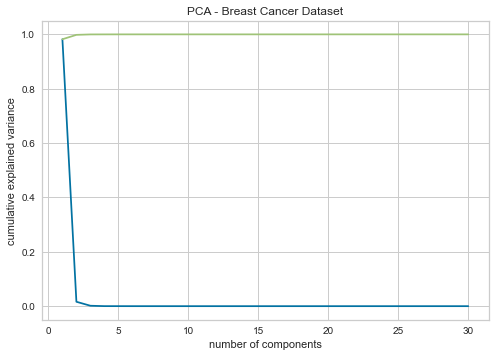

In [526]:
X, y = load_data('wdbc-modified.data')
print('Kurtosis for normal distribution :', kurtosis(y)) 

pca = PCA().fit(X)

# https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA - Breast Cancer Dataset")
plt.show()

In [527]:
start = time.time()
pca = PCA(n_components= 2).fit(X)
print("Time(s) " + str(time.time() - start))
print("original shape:", X.shape)
X_pca = pca.transform(X)
print("transformed shape:", X_pca.shape)
print()

Time(s) 0.0063936710357666016
original shape: (569, 30)
transformed shape: (569, 2)



In [528]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)
cv_score = cross_val_score(clf, X_train, y_train, cv=20).mean()
print("Cross validation score: " + str(cv_score))

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

Cross validation score: 0.9013833992094862
Test Accuracy: 0.9122807017543859


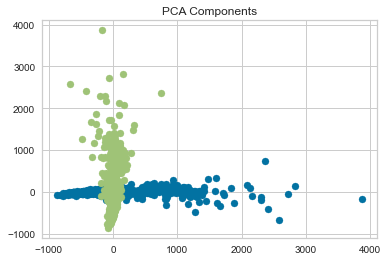

In [529]:
n = 2
pca = PCA(n_components=n) 
X_pca=pca.fit_transform(X)

plt.figure(figsize=(6,4))
plt.title('PCA Components')

for i in range(0, n):
    for j in range(0, n):
        if i == j:
            continue
        plt.scatter(X_pca[:,i], X_pca[:,j])

## ICA

In [530]:
X, y = load_data('wdbc-modified.data')

In [531]:
best_n = (0, 0)
for i in range(2, 31):
    ica = FastICA(n_components=i, max_iter=10000, tol=0.1).fit(X)
    X_ica = ica.fit_transform(X)  
    X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size=0.2)
    clf = DecisionTreeClassifier(max_depth = 26, min_samples_leaf = 3)
    cv_score = cross_val_score(clf, X_train, y_train, cv=20).mean()
    if (cv_score > best_n[1]):
        best_n = (i, cv_score)

clf = DecisionTreeClassifier(max_depth = 26, min_samples_leaf = 3)
print("Best n_components: " + str(best_n[0]))
ica = FastICA(n_components=int(best_n[0]), max_iter=10000, tol=0.1).fit(X)
X_ica = ica.fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

Best n_components: 5
Test Accuracy: 0.8596491228070176


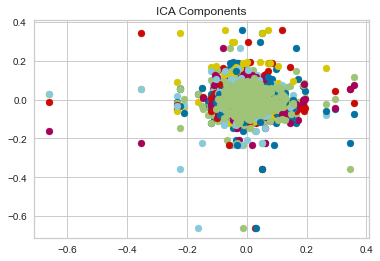

In [532]:
n = 5
ica = FastICA(n_components=n, max_iter=10000, tol=0.1) 
X_ica=ica.fit_transform(X)

plt.figure(figsize=(6,4))
plt.title('ICA Components')

for i in range(0, n):
    for j in range(0, n):
        if i == j:
            continue
        plt.scatter(X_ica[:,i], X_ica[:,j])

## Randomized Projections

In [533]:
X, y = load_data('wdbc-modified.data')

In [534]:
best_n = (0, 0)
for i in range(2, 31):
    rp = random_projection.SparseRandomProjection(n_components=i, random_state=42).fit(X)
    X_rp = rp.fit_transform(X)  
    X_train, X_test, y_train, y_test = train_test_split(X_rp, y, test_size=0.2)
    clf = DecisionTreeClassifier(max_depth = 26, min_samples_leaf = 3)
    cv_score = cross_val_score(clf, X_train, y_train, cv=20).mean()
    if (cv_score > best_n[1]):
        best_n = (i, cv_score)

print("Best n_components: " + str(best_n[0]))
rp = random_projection.SparseRandomProjection(n_components=best_n[0], random_state=42).fit(X)
X_rp = rp.fit_transform(X)  
X_train, X_test, y_train, y_test = train_test_split(X_rp, y, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

Best n_components: 11
Test Accuracy: 0.9473684210526315


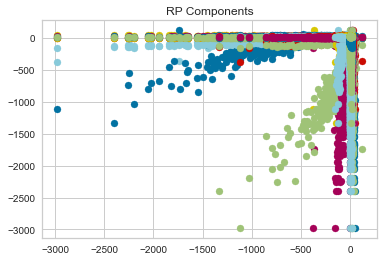

In [535]:
n = 11
rp = random_projection.SparseRandomProjection(n_components=n)
X_rp=rp.fit_transform(X)

plt.figure(figsize=(6,4))
plt.title('RP Components')

for i in range(0, n):
    for j in range(0, n):
        if i == j:
            continue
        plt.scatter(X_rp[:,i], X_rp[:,j])

## SVD

2

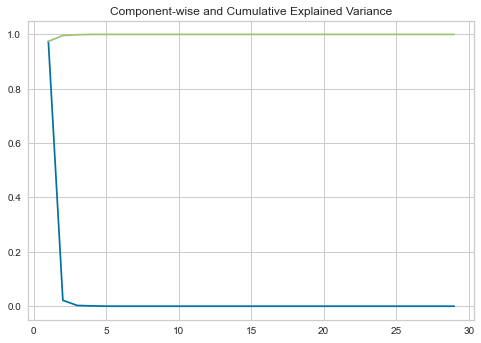

In [536]:
X, y = load_data("wdbc-modified.data")
tsvd = TruncatedSVD(n_components=X.shape[1]-1)
X_tsvd = tsvd.fit(X)

tsvd_var_ratios = tsvd.explained_variance_ratio_
plt.plot(range(1, len(tsvd_var_ratios) + 1), tsvd_var_ratios)
plt.plot(range(1, len(tsvd_var_ratios) + 1), np.cumsum(tsvd_var_ratios))
plt.title("Component-wise and Cumulative Explained Variance")

# https://chrisalbon.com/machine_learning/feature_engineering/select_best_number_of_components_in_tsvd/
# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

select_n_components(tsvd_var_ratios, 0.99)


In [537]:
svd = TruncatedSVD(n_components=2).fit(X)
X_svd = svd.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.2)
cv_score = cross_val_score(clf, X_train, y_train, cv=20).mean()
print("Cross validation score: " + str(cv_score))

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

Cross validation score: 0.9298418972332015
Test Accuracy: 0.9210526315789473


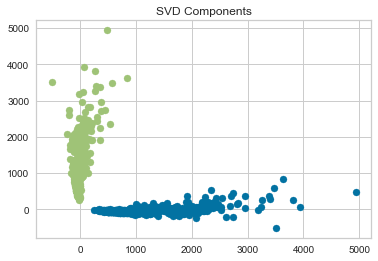

In [538]:
n = 2
svd = TruncatedSVD(n_components=n)
X_svd=svd.fit_transform(X)

plt.figure(figsize=(6,4))
plt.title('SVD Components')

for i in range(0, n):
    for j in range(0, n):
        if i == j:
            continue
        plt.scatter(X_svd[:,i], X_svd[:,j])

# Tic Tac Toe

## PCA

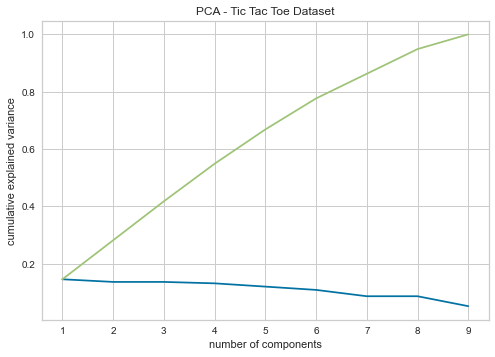

In [539]:
X, y = load_data('tic-tac-toe-modified.data')

pca = PCA().fit(X)

# https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA - Tic Tac Toe Dataset")
plt.show()

In [540]:
start = time.time()
pca = PCA(n_components= 8).fit(X)
print("Time(s) " + str(time.time() - start))
print("original shape:", X.shape)
X_pca = pca.transform(X)
print("transformed shape:", X_pca.shape)
print()

Time(s) 0.0019829273223876953
original shape: (958, 9)
transformed shape: (958, 8)



In [541]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)
cv_score = cross_val_score(clf, X_train, y_train, cv=20).mean()
print("Cross validation score: " + str(cv_score))

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

Cross validation score: 0.928272604588394
Test Accuracy: 0.96875


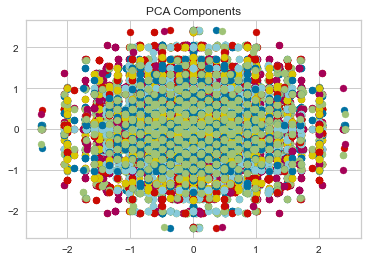

In [542]:
n = 8
pca = PCA(n_components=n) 
X_pca=pca.fit_transform(X)

plt.figure(figsize=(6,4))
plt.title('PCA Components')

for i in range(0, n):
    for j in range(0, n):
        if i == j:
            continue
        plt.scatter(X_pca[:,i], X_pca[:,j])

## ICA

In [543]:
X, y = load_data('tic-tac-toe-modified.data')

best_n = (0, 0)
for i in range(2, 9):
    ica = FastICA(n_components=i, max_iter=10000, tol=0.1).fit(X)
    X_ica = ica.fit_transform(X)  
    X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size=0.2)
    clf = DecisionTreeClassifier(max_depth = 35, min_samples_leaf = 1)
    cv_score = cross_val_score(clf, X_train, y_train, cv=20).mean()
    if (cv_score > best_n[1]):
        best_n = (i, cv_score)

clf = DecisionTreeClassifier(max_depth = 35, min_samples_leaf = 1)
print("Best n_components: " + str(best_n[0]))
ica = FastICA(n_components=int(best_n[0]), max_iter=10000, tol=0.1).fit(X)
X_ica = ica.fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

Best n_components: 6
Test Accuracy: 0.765625


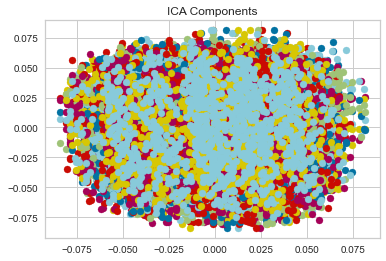

In [544]:
n = 6
ica = FastICA(n_components=n, max_iter=10000, tol=0.1) 
X_ica=ica.fit_transform(X)

plt.figure(figsize=(6,4))
plt.title('ICA Components')

for i in range(0, n):
    for j in range(0, n):
        if i == j:
            continue
        plt.scatter(X_ica[:,i], X_ica[:,j])

## Randomized Projections

In [545]:
X, y = load_data('tic-tac-toe-modified.data')

best_n = (0, 0)
for i in range(2, 9):
    rp = random_projection.SparseRandomProjection(n_components=i, random_state=42).fit(X)
    X_rp = rp.fit_transform(X)  
    X_train, X_test, y_train, y_test = train_test_split(X_rp, y, test_size=0.2)
    clf = DecisionTreeClassifier(max_depth = 35, min_samples_leaf = 1)
    cv_score = cross_val_score(clf, X_train, y_train, cv=20).mean()
    if (cv_score > best_n[1]):
        best_n = (i, cv_score)

print("Best n_components: " + str(best_n[0]))
rp = random_projection.SparseRandomProjection(n_components=best_n[0], random_state=42).fit(X)
X_rp = rp.fit_transform(X)  
X_train, X_test, y_train, y_test = train_test_split(X_rp, y, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

Best n_components: 8
Test Accuracy: 0.6354166666666666


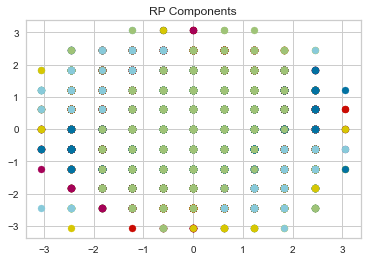

In [546]:
n = 8
rp = random_projection.SparseRandomProjection(n_components=n)
X_rp=rp.fit_transform(X)

plt.figure(figsize=(6,4))
plt.title('RP Components')

for i in range(0, n):
    for j in range(0, n):
        if i == j:
            continue
        plt.scatter(X_rp[:,i], X_rp[:,j])

## SVD

8

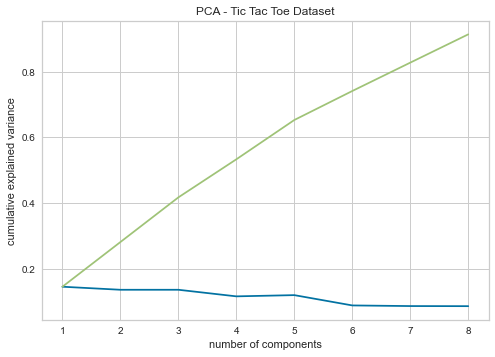

In [547]:
X, y = load_data("tic-tac-toe-modified.data")
tsvd = TruncatedSVD(n_components=X.shape[1]-1)
X_tsvd = tsvd.fit(X)

tsvd_var_ratios = tsvd.explained_variance_ratio_
plt.plot(range(1, len(tsvd_var_ratios) + 1), tsvd_var_ratios)
plt.plot(range(1, len(tsvd_var_ratios) + 1), np.cumsum(tsvd_var_ratios))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA - Tic Tac Toe Dataset")

# https://chrisalbon.com/machine_learning/feature_engineering/select_best_number_of_components_in_tsvd/
# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

select_n_components(tsvd_var_ratios, 0.99)

In [548]:
svd = TruncatedSVD(n_components=8).fit(X)
X_svd = svd.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

Test Accuracy: 0.984375


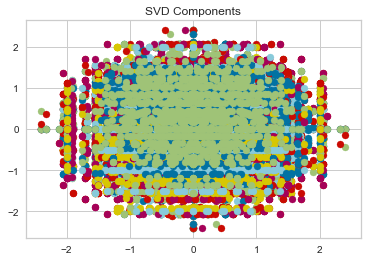

In [549]:
n = 8
svd = TruncatedSVD(n_components=n)
X_svd=svd.fit_transform(X)

plt.figure(figsize=(6,4))
plt.title('SVD Components')

for i in range(0, n):
    for j in range(0, n):
        if i == j:
            continue
        plt.scatter(X_svd[:,i], X_svd[:,j])